In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [23]:
data=pd.DataFrame(columns=['Pictures','label'])

In [24]:
face_cascade = cv2.CascadeClassifier('Haarcascades\haarcascade_frontalface_default.xml')

In [25]:
imgpath = 'Images\sample11.jpg'

In [26]:
img = cv2.imread(imgpath)

In [27]:
img=cv2.resize(img,(800,600))

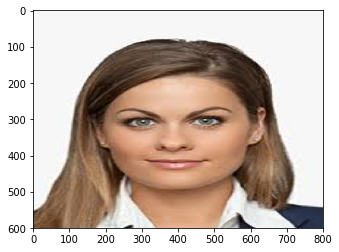

In [28]:
plt.imshow(img[:,:,::-1])
plt.show()

In [29]:
print("enter label : ")
lab=int(input(),10)

enter label : 
98


In [30]:
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [31]:
faces = face_cascade.detectMultiScale(img1,scaleFactor = 1.05, minNeighbors=7)

In [32]:
def LBP(a):
    n=a.shape[0]
    lbp=np.array([[0 for i in range(n-2)] for j in range(n-2)])
    print(lbp.shape)
    for i in range(n-2):
        for j in range(n-2):
            pat=''
            ther=a[i+1][j+1]
            if ther>a[i][j]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+1]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i+1][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i+2][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i+1][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+1]:
                pat+='0'
            else:
                pat+='1'
            lbp[i][j]=int(pat,2)
    return lbp

In [45]:
def HOG(img):
    grid_x,grid_y=8,8
    m=img.shape[0]//grid_x
    for i in range(grid_x-1):
        for j in range(grid_y-1):
            temp=img[j*m:(j+1)*m,i*m:(i+1)*m]
            x=np.reshape(temp,[1,m*m])
            plt.hist(x[0],bins=256)
            plt.show()

(363, 363)


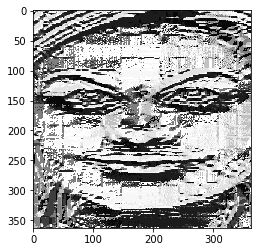

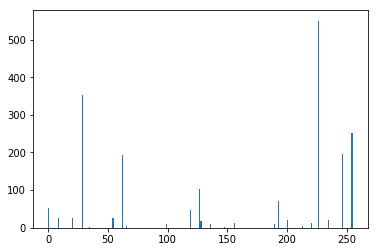

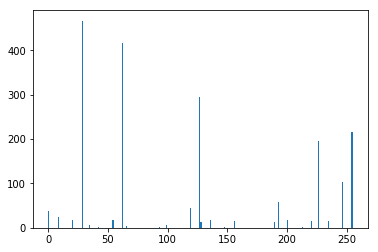

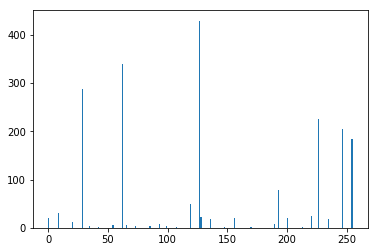

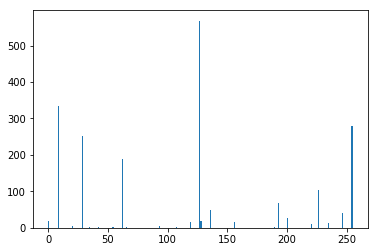

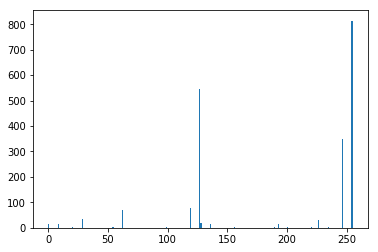

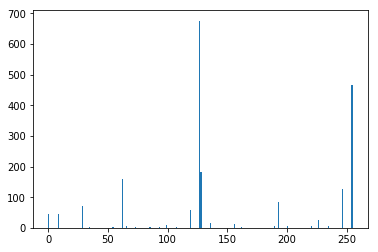

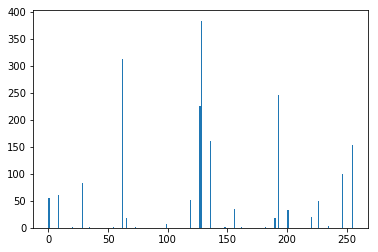

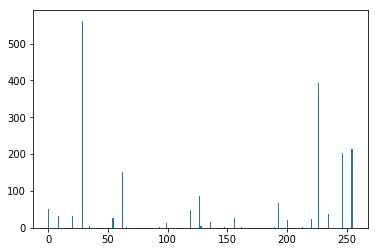

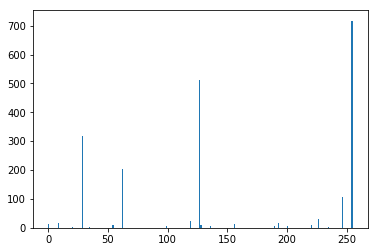

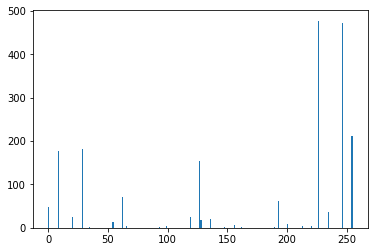

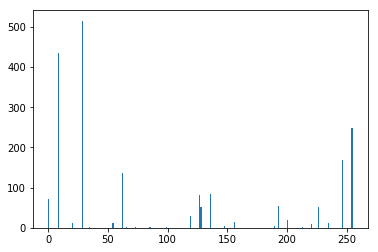

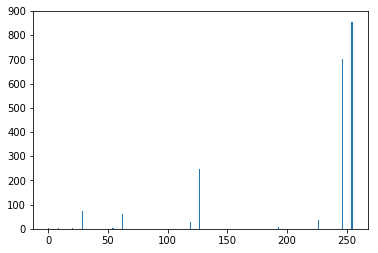

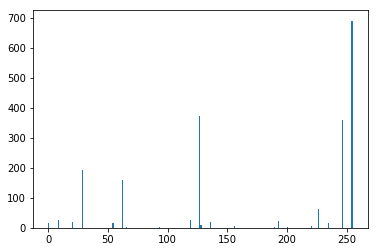

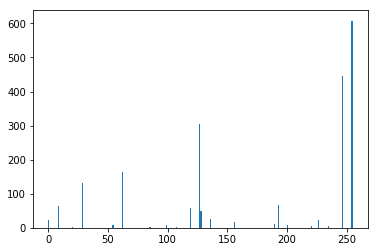

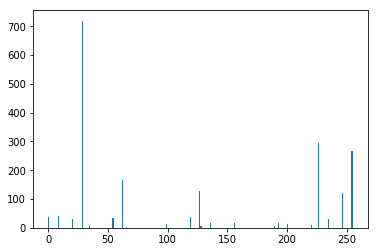

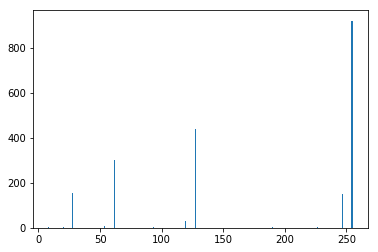

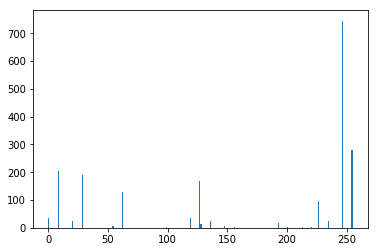

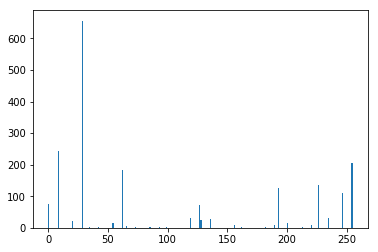

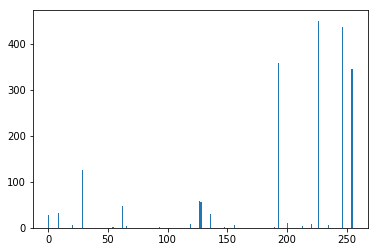

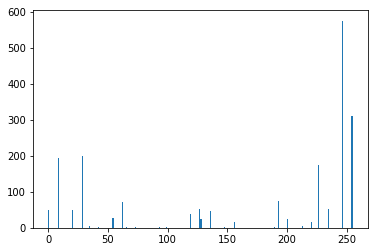

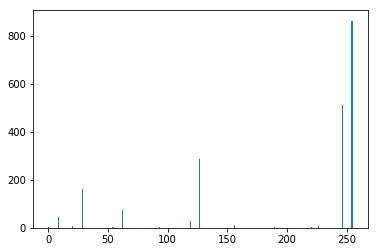

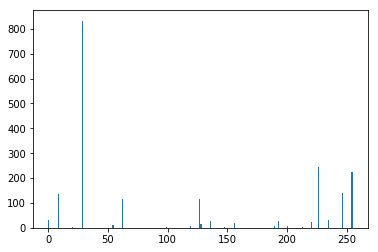

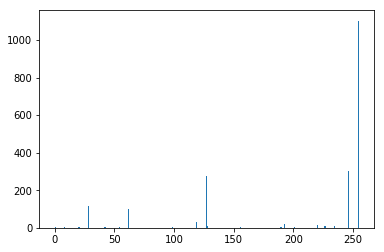

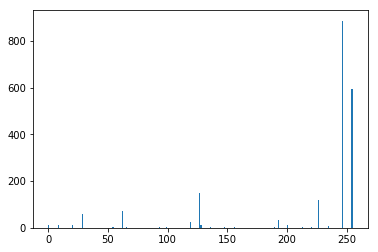

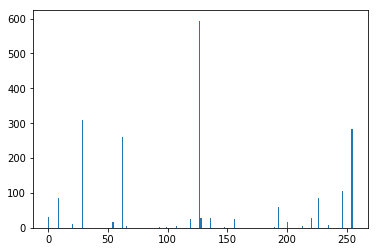

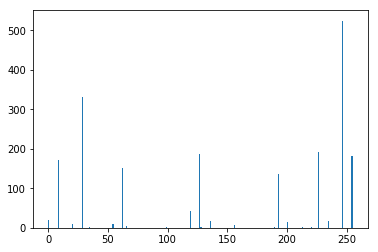

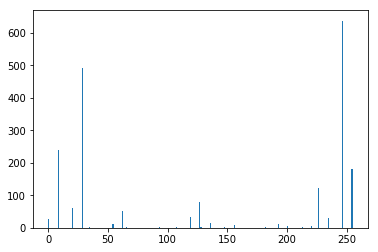

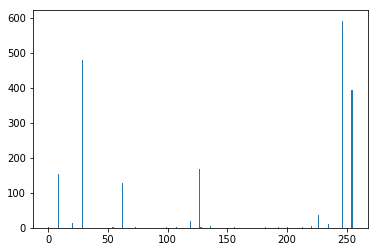

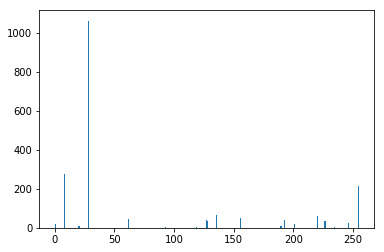

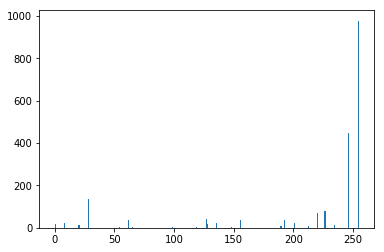

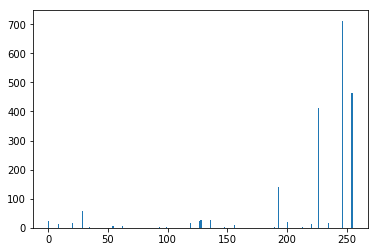

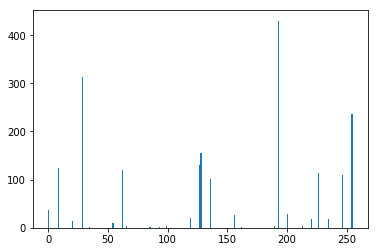

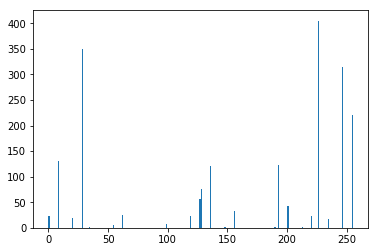

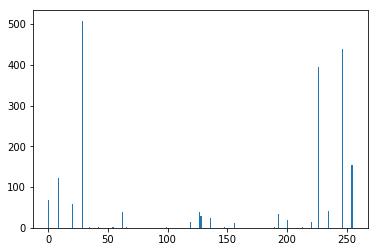

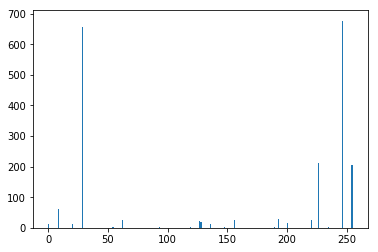

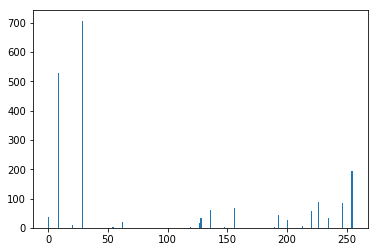

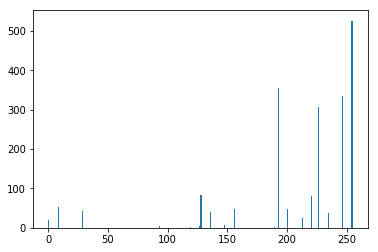

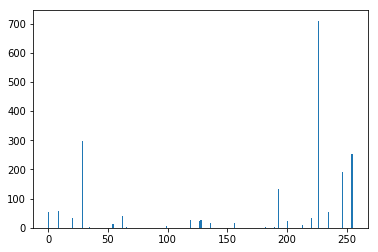

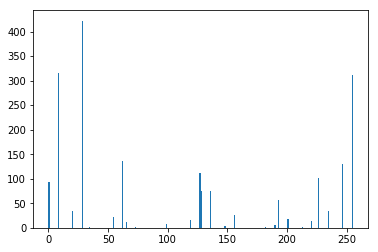

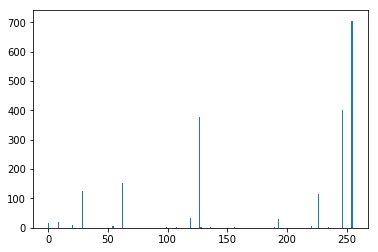

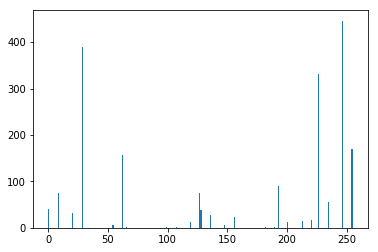

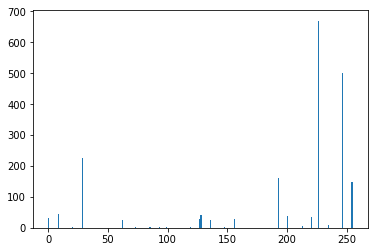

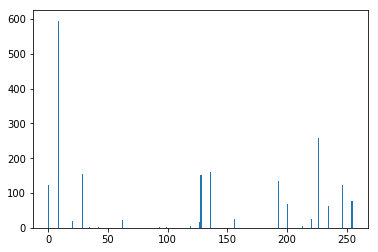

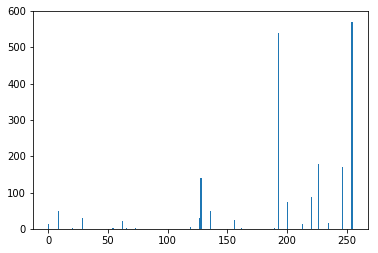

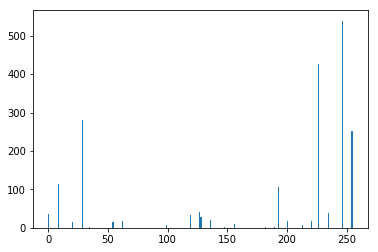

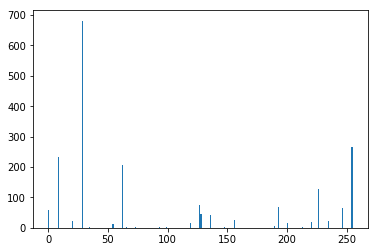

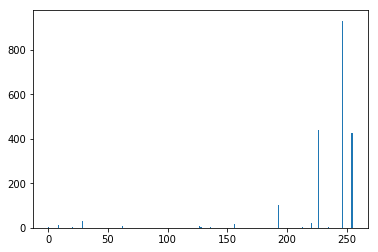

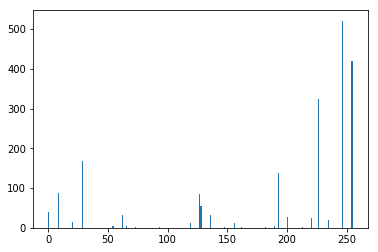

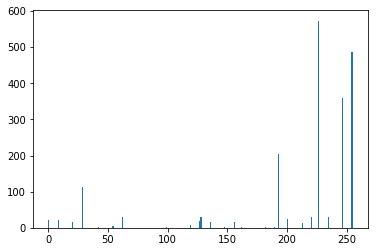

(296, 296)


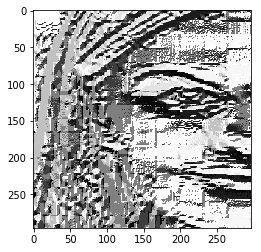

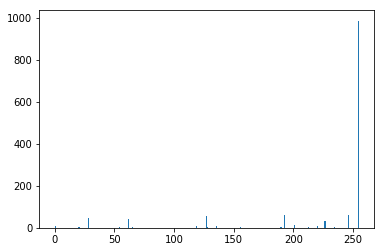

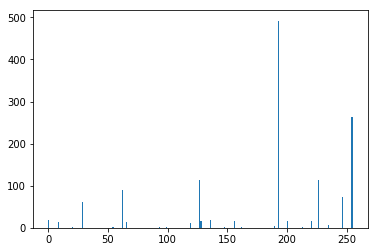

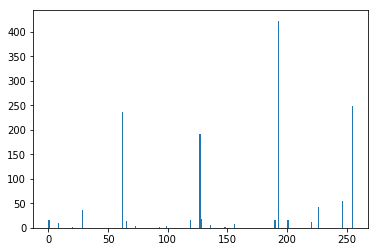

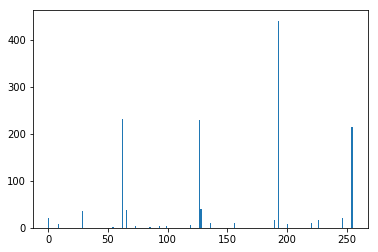

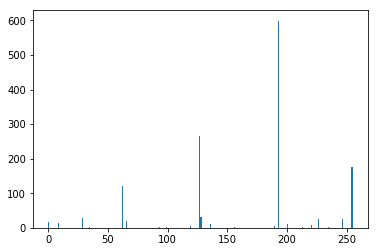

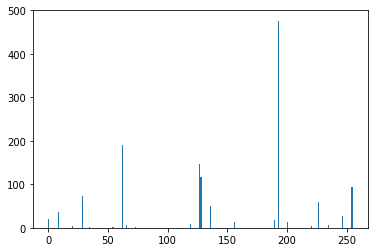

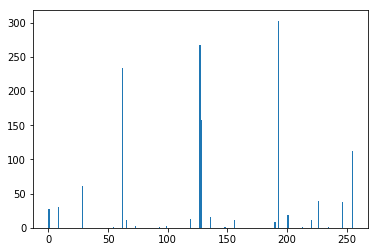

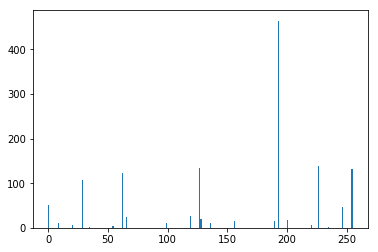

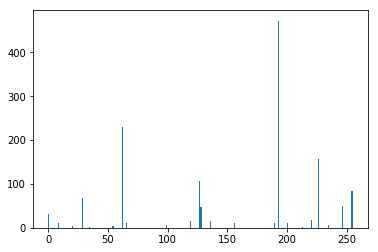

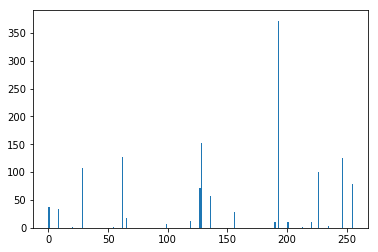

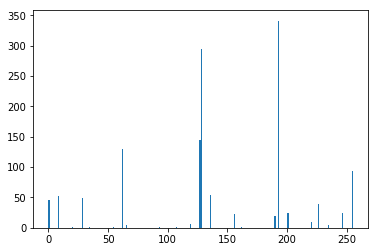

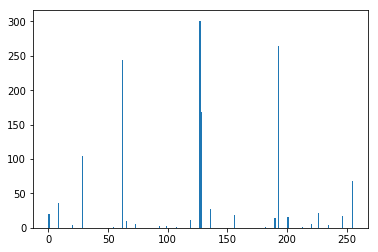

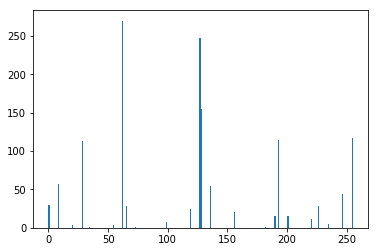

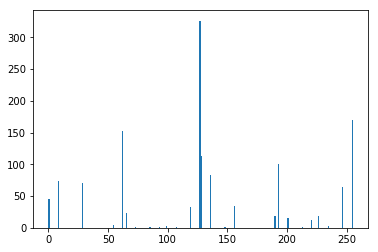

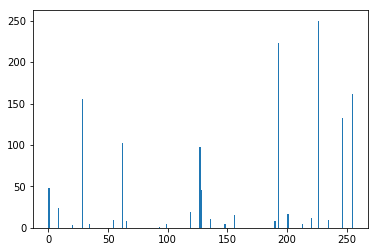

In [ ]:
for (x,y,w,h) in faces:
    crop_img = img1[y:y+h, x:x+w]
    lbp_img = LBP(crop_img)
    df1=pd.DataFrame({'Pictures':[lbp_img],'label':[lab]})
    data=data.append(df1)
    plot=plt.imshow(lbp_img,cmap='gray')
    plt.show()
    HOG(lbp_img)

In [42]:
data.append(df1)

,Pictures,label
0,"[[227, 227, 193, 255, 28, 28, 28, 28, 28, 28, ...",98
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",98
0,"[[227, 227, 193, 255, 28, 28, 28, 28, 28, 28, ...",98
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",98
0,"[[227, 227, 193, 255, 28, 28, 28, 28, 28, 28, ...",98
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",98
0,"[[227, 227, 193, 255, 28, 28, 28, 28, 28, 28, ...",98
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",98
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",98


In [36]:
x

91